In [14]:
import casatools
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table
import astropy.coordinates as ac
from astropy import units

In [2]:
cd ~/code/dsa2000sim

/Users/claw/code/dsa2000sim


In [3]:
tabname = 'antenna_positions_LWA_coordinates.tab'
#conf_file = 'LWA_coordinates.cfg'
conf_file = 'LWA352_tmp.cfg'

In [4]:
tb = casatools.table()
tb.fromascii(tabname, conf_file, firstline=3, sep=' ', columnnames=['X', 'Y', 'Z', 'DIAM', 'NAME'], datatypes=['D', 'D', 'D', 'D', 'A'])
xx=tb.getcol('X')
yy=tb.getcol('Y')
zz=tb.getcol('Z')
diam=tb.getcol('DIAM')
anames=tb.getcol('NAME')
tb.close()


True

Text(-2408809.3052168754, -4477113.145719079, 'LWA-94')

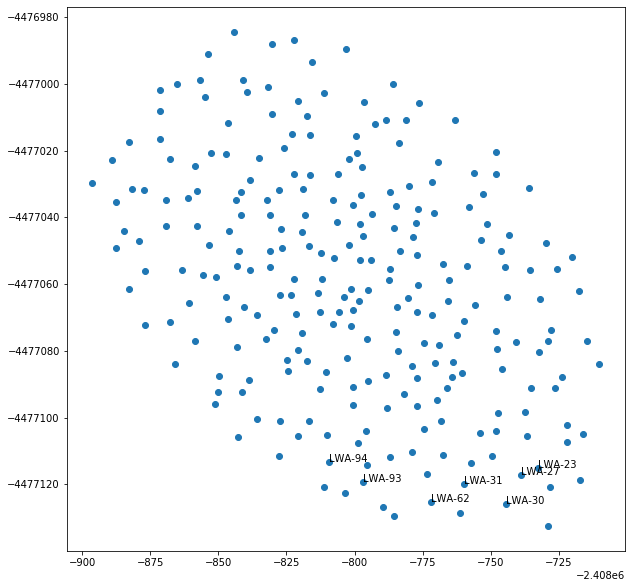

In [5]:
plt.figure(figsize=(10,10))
x0 = -2409000
y0 = -4477250
delta = 300
ww = np.where((xx < x0+delta)*(xx > x0)*(yy > y0)*(yy < y0+delta))
plt.scatter(xx[ww], yy[ww])
#plt.scatter(xx, yy)
i0 = np.where(anames == 'LWA-23')[0][0]
i1 = np.where(anames == 'LWA-27')[0][0]
i2 = np.where(anames == 'LWA-30')[0][0]
i3 = np.where(anames == 'LWA-31')[0][0]
i4 = np.where(anames == 'LWA-62')[0][0]
i5 = np.where(anames == 'LWA-93')[0][0]
i6 = np.where(anames == 'LWA-94')[0][0]
plt.text(xx[i0], yy[i0], anames[i0])
plt.text(xx[i1], yy[i1], anames[i1])
plt.text(xx[i2], yy[i2], anames[i2])
plt.text(xx[i3], yy[i3], anames[i3])
plt.text(xx[i4], yy[i4], anames[i4])
plt.text(xx[i5], yy[i5], anames[i5])
plt.text(xx[i6], yy[i6], anames[i6])

In [25]:
for ii in [i0, i1, i2, i3, i4, i5, i6]:
    loc = ac.EarthLocation.from_geocentric(xx[ii], yy[ii], zz[ii], unit='m')
    loc2 = ac.EarthLocation.from_geodetic(lon=loc.lon, lat=loc.lat - 3*units.arcsec)
    print(xx[ii]-loc2.x.value, yy[ii]-loc2.y.value, zz[ii]-loc2.z.value)
    xx[ii] = loc2.x.value
    yy[ii] = loc2.y.value
    zz[ii] = loc2.z.value

26.516547304578125 49.2863445552066 73.62896234402433
26.516545369289815 49.28623828664422 73.6290327408351
26.51645901147276 49.28605880588293 73.62918096035719
26.516600027214736 49.285944865085185 73.62920593563467
26.516582540702075 49.28571877628565 73.62936042062938
26.516764807980508 49.285479883663356 73.62945280456915
26.51689318101853 49.28540037944913 73.6294596507214


Text(-2408835.8221100564, -4477162.431119459, 'LWA-94')

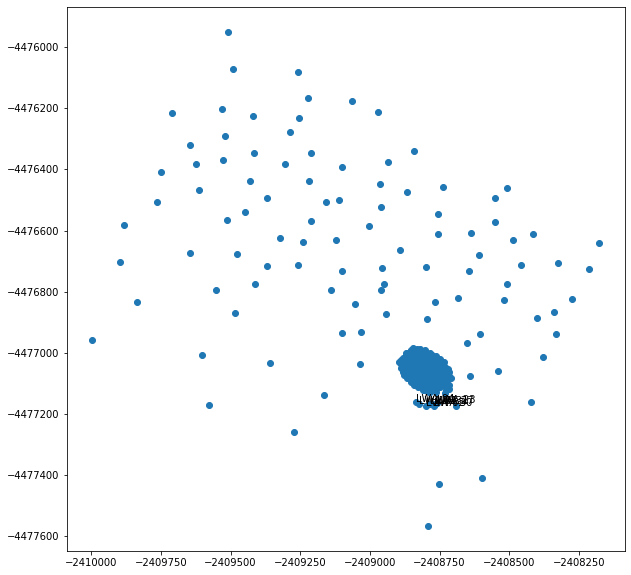

In [26]:
plt.figure(figsize=(10,10))
x0 = -2409000
y0 = -4477250
delta = 300
ww = np.where((xx < x0+delta)*(xx > x0)*(yy > y0)*(yy < y0+delta))
plt.scatter(xx, yy)
plt.text(xx[i0], yy[i0], anames[i0])
plt.text(xx[i1], yy[i1], anames[i1])
plt.text(xx[i2], yy[i2], anames[i2])
plt.text(xx[i3], yy[i3], anames[i3])
plt.text(xx[i4], yy[i4], anames[i4])
plt.text(xx[i5], yy[i5], anames[i5])
plt.text(xx[i6], yy[i6], anames[i6])

In [29]:
tab = Table([xx, yy, zz, diam, anames], names=['x', 'y', 'z', 'diam', 'name'])
tab.write('LWA352_coordinates_mod.cfg', format='ascii', overwrite=True)